In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py

In [2]:
import lfpreg

In [3]:
plt.rc("figure", dpi=100)

## Load example datasets

In [5]:
data_home = "D:/Neuropixel/To_Columbia/pt02"

In [7]:
# load geometry
geom = loadmat(f"{data_home}/pt02_chanMap.mat")
geom = np.stack([geom["xcoords"], geom["ycoords"]], axis=1)[:, :, 0]

In [6]:
# load 60k samples (24 seconds) from a dataset
raw_a = np.memmap(f"{data_home}/pt03_full.imec0.lf.bin", dtype=np.int16).reshape(-1, 385)
raw_a = raw_a[60000:120000, :-1].astype(np.float32).T

In [10]:
raw_b = loadmat(f"{data_home}/pt02_LFP.mat")
raw_a = raw_b["LFPMatrix"][0::2]

TypeError: unhashable type: 'slice'

In [20]:
# another demo dataset
# with h5py.File(f"{data_home}/Pt02_full.h5") as f:
#     raw_b = f["raster"][:].astype(np.float32).T
raw_a = raw_b["LFPMatrix"][0::2][0:191]
geom2 = geom[0::2][0:191]
raw_a.shape

(191, 2182500)

## LFP raster

In [21]:
# just channels 20-280 from this data are useful
# rlfp = lfpreg.lfpraster(raw_a, geom, range(20, 280))
# also, a version with current source density for comparison
# rcsd = lfpreg.lfpraster(raw_a, geom, range(20, 280), csd=True)
rcsd = lfpreg.lfpraster(raw_a, geom2, csd=True)

orig shape (191, 2182500)
sub shape (191, 2182500)


averaging each z: 100%|██████████| 191/191 [00:03<00:00, 48.84it/s]


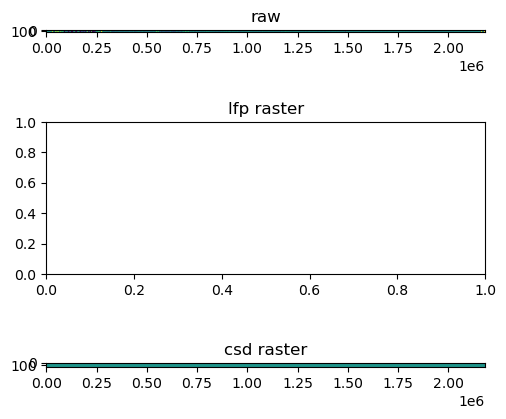

In [22]:
# plot these and the original raw data
fig, (aa, ab, ac) = plt.subplots(3, 1, figsize=(5, 5))
aa.imshow(raw_a[20:280], aspect=0.25 * 6000 / 26)
# ab.imshow(rlfp, aspect=0.25 * 6000 / 13)
ac.imshow(rcsd, aspect=0.25 * 6000 / 13)
aa.set_title("raw")
ab.set_title("lfp raster")
ac.set_title("csd raster")
fig.tight_layout(pad=0.5)
plt.show()

## Registration

In [23]:
# p_lfp = lfpreg.register_rigid(rlfp[:, ::5])
p_csd = lfpreg.register_rigid(rcsd[:, ::5])

MemoryError: Unable to allocate 710. GiB for an array with shape (436500, 436500) and data type float32

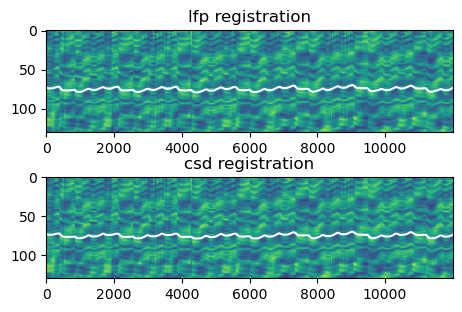

In [11]:
# plot these and the original raw data
fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 3))
aa.imshow(rlfp[:, ::5], aspect=0.25 * 1200 / 13)
ab.imshow(rlfp[:, ::5], aspect=0.25 * 1200 / 13)
aa.plot(75 + p_lfp, c="w")
ab.plot(75 + p_csd, c="w")
aa.set_title("lfp registration")
ab.set_title("csd registration")
fig.tight_layout(pad=0.5)
plt.show()

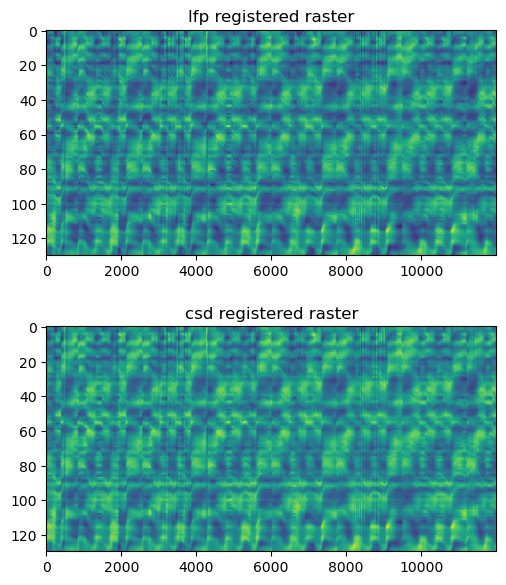

In [13]:
# compare registered rasters
reglfp = lfpreg.rigid_registered_raster(rlfp[:, ::5], p_lfp)
regcsd = lfpreg.rigid_registered_raster(rlfp[:, ::5], p_csd)
fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
aa.imshow(reglfp, aspect=0.5 * 1200 / 13)
ab.imshow(regcsd, aspect=0.5 * 1200 / 13)
aa.set_title("lfp registered raster")
ab.set_title("csd registered raster")
fig.tight_layout(pad=0.5)
plt.show()

## Another dataset, where CSD helps

In [15]:
rlfp = lfpreg.lfpraster(raw_b[:, :12000], geom)
rcsd = lfpreg.lfpraster(raw_b[:, :12000], geom, csd=True)
p_lfp = lfpreg.register_rigid(rlfp)
p_csd = lfpreg.register_rigid(rcsd)

orig shape (384, 12000)
sub shape (384, 12000)


averaging each z:   0%|          | 0/192 [00:00<?, ?it/s]

orig shape (384, 12000)
sub shape (384, 12000)


averaging each z:   0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

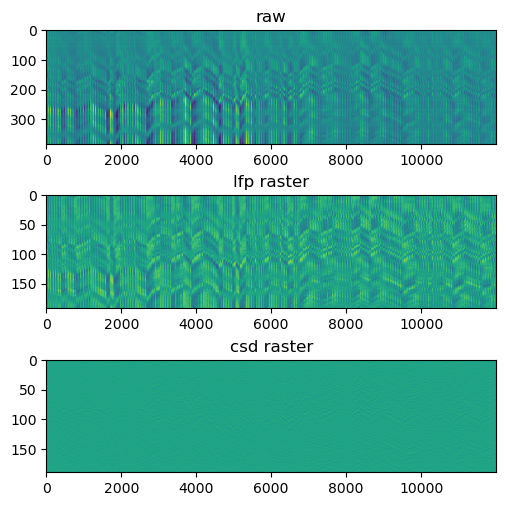

In [17]:
# plot these and the original raw data
fig, (aa, ab, ac) = plt.subplots(3, 1, figsize=(5, 5))
aa.imshow(raw_b[:, :12000], aspect=0.25 * 1200 / 38)
ab.imshow(rlfp, aspect=0.25 * 1200 / 19)
ac.imshow(rcsd, aspect=0.25 * 1200 / 19)
aa.set_title("raw")
ab.set_title("lfp raster")
ac.set_title("csd raster")
fig.tight_layout(pad=0.5)
plt.show()

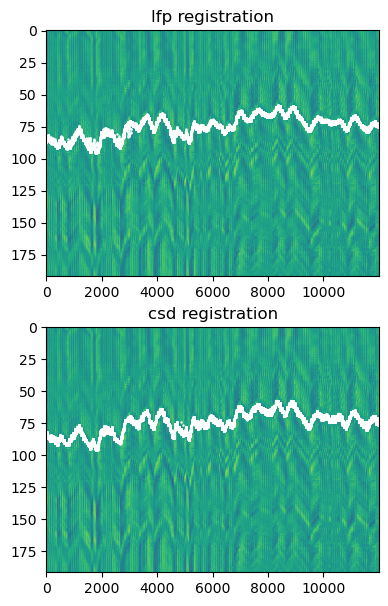

In [18]:
fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
aa.imshow(rlfp, aspect=0.5 * 1200 / 13)
ab.imshow(rlfp, aspect=0.5 * 1200 / 13)
aa.scatter(np.arange(len(p_lfp)), 75 + p_lfp, c="w", s=0.5)
ab.scatter(np.arange(len(p_lfp)), 75 + p_csd, c="w", s=0.5)
aa.set_title("lfp registration")
ab.set_title("csd registration")
fig.tight_layout(pad=0.5)
plt.show()

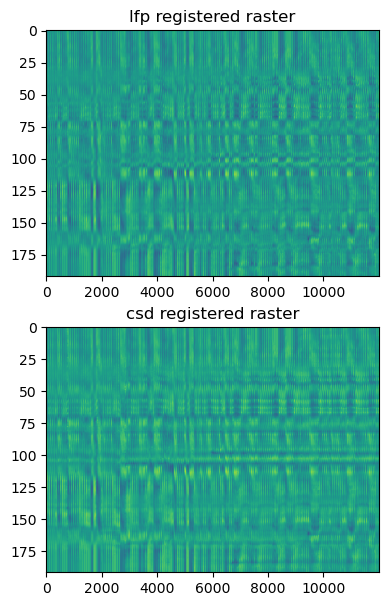

In [19]:
# compare registered rasters
reglfp = lfpreg.rigid_registered_raster(rlfp, p_lfp)
regcsd = lfpreg.rigid_registered_raster(rlfp, p_csd)
fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
aa.imshow(reglfp, aspect=0.5 * 1200 / 13)
ab.imshow(regcsd, aspect=0.5 * 1200 / 13)
aa.set_title("lfp registered raster")
ab.set_title("csd registered raster")
fig.tight_layout(pad=0.5)
plt.show()